# Generate cellxgene

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures/'
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

'/home/jovyan/my-conda-envs/sc_analysis/bin/python'

# Prepare INPUT

## Load raw and annoted andata

In [2]:
adata_annotated = sc.read('/nfs/team292/vl6/Mouse_Sanger/germcells_all2.h5ad')
adata_annotated.X.shape

(10411, 17985)

In [3]:
adata = anndata.AnnData(X=adata_annotated.raw.X, var=adata_annotated.raw.var, obs=adata_annotated.obs, asview=False)

In [4]:
adata.obs['lineage'] = 'GermCells'

In [5]:
cell_annot = adata_annotated.obs['germcells_annotation'].to_dict()
adata.obs['celltype'] = adata.obs_names.map(cell_annot)
adata.obs['celltype'].value_counts()

oogonia_STRA8        3214
oogonia_meiotic      2075
GC_male              1578
GC_female            1406
PGC                   968
pre_oocyte            683
pre_spermatogonia     281
oocyte                206
Name: celltype, dtype: int64

In [6]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['celltype'].value_counts()

Total number of cells: 10411
Total number of genes: 17985


oogonia_STRA8        3214
oogonia_meiotic      2075
GC_male              1578
GC_female            1406
PGC                   968
pre_oocyte            683
pre_spermatogonia     281
oocyte                206
Name: celltype, dtype: int64

## Import UMAP

In [7]:
adata_annotated = adata_annotated[[ i in adata.obs_names for i in adata_annotated.obs_names ]]

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [8]:
adata.obsm['X_umap'] = adata_annotated.obsm['X_umap']
adata.obsm['X_scVI'] = adata_annotated.obsm['X_scVI']
# adata.obsp['connectivities'] = adata_annotated.obsp['connectivities']
# adata.obsp['distances'] = adata_annotated.obsp['distances']
# adata.uns['celltype_colors'] = adata_annotated.uns['celltype_colors']
# adata.uns['neighbors'] = adata_annotated.uns['neighbors']

## Remove un necessary data

In [9]:
del adata_annotated

In [10]:
adata.obs.head()

,n_genes,sample,stage,sex,location,percent_mito,n_counts,batch,S_score,G2M_score,...,prob_PGC,prob_oocyte,prob_oogonia_STRA8,prob_oogonia_meiotic,prob_pre_oocyte,prob_pre_spermatogonia,germcells_annotation,sex_all,lineage,celltype
HCA_Mou_10828699_AAACGGGCATCGTCGG-Sanger-female-Sanger,5710,HCA_Mou_10828699,12.5,female,gonad,0.016492,29145.0,2,-2.316602,2.177389,...,0.254175,0.002749,0.025191,0.000223,0.001003,0.017371,GC_female,female,GermCells,GC_female
HCA_Mou_10828699_AAAGATGTCTGGTATG-Sanger-female-Sanger,6100,HCA_Mou_10828699,12.5,female,gonad,0.025362,27285.0,2,-0.270270,1.588396,...,0.191000,0.023621,0.235273,0.037149,0.078661,0.164037,oogonia_STRA8,female,GermCells,oogonia_STRA8
HCA_Mou_10828699_AAAGCAAGTAATAGCA-Sanger-female-Sanger,6084,HCA_Mou_10828699,12.5,female,gonad,0.022031,29295.0,2,0.548263,-0.410751,...,0.283593,0.003869,0.077238,0.002123,0.007859,0.092630,oogonia_STRA8,female,GermCells,oogonia_STRA8
HCA_Mou_10828699_AAAGCAAGTACTTCTT-Sanger-female-Sanger,5671,HCA_Mou_10828699,12.5,female,gonad,0.018903,25286.0,2,-1.610039,-0.007594,...,0.069073,0.000565,0.042082,0.000489,0.001670,0.031876,oogonia_STRA8,female,GermCells,oogonia_STRA8
HCA_Mou_10828699_AAAGTAGAGTACGACG-Sanger-female-Sanger,5674,HCA_Mou_10828699,12.5,female,gonad,0.029509,23788.0,2,-1.474904,3.457167,...,0.075473,0.003590,0.150000,0.005684,0.058598,0.580468,oogonia_STRA8,female,GermCells,oogonia_STRA8


In [11]:
del adata.obs['tissue']
del adata.obs['leiden']
del adata.obs['cell_type']
del adata.obs['doublet_score']
del adata.obs['doublet_score_0.75']

# Normalize data

In [12]:
adata.raw = adata.copy()

In [13]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)                                                                                                            
# sc.pp.scale(adata, max_value=10)

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


... storing 'lineage' as categorical
... storing 'celltype' as categorical


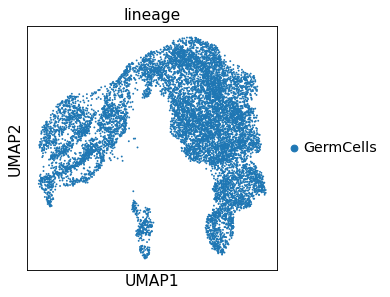

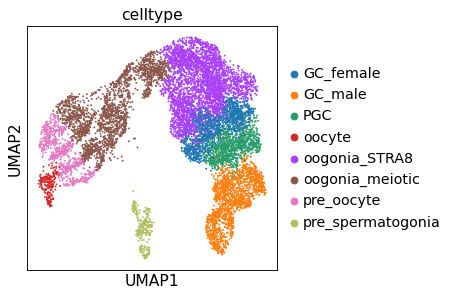

In [14]:
sc.pl.umap(adata, color='lineage')
sc.pl.umap(adata, color='celltype')

In [15]:
adata.write('/nfs/cellgeni/tickets/tic-613/mouse_germcells.h5ad')